In [39]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from photo_sketch_dataset import PhotoSketchDataset

In [40]:
# fill in correct path below
csv_path = "test_pairs_st.csv"
data_path = "/userHome/userhome1/sojeong/psc/Sketchy"  # path to the Sketchy dataset

dataset = PhotoSketchDataset(csv_path, data_path, mode="test")

In [48]:
# pick a class below
category = "bell"
category_names=['airplane', 'alarm', 'ant','ape', 'apple', 'armor', 'axe', 'banana', 'bat', 'bear', 'bee', 'beetle', 'bell', 'bench', 
                'bicycle', 'blimp', 'bread', 'butterfly', 'cabin', 'camel','candle', 'cannon', 'car','castle', 'cat', 'chair', 'chicken', 
                'church', 'couch', 'cow', 'crab', 'crocodilian', 'cup', 'deer', 'dog', 'dolphin', 'door', 'duck', 'elephant', 'eyeglasses', 
                'fan', 'fish', 'flower', 'frog', 'geyser', 'giraffe', 'guitar', 'hamburger', 'hammer', 'harp', 'hat', 'hedgehog', 'helicopter', 
                'hermit', 'horse', 'hot-air', 'hotdog', 'hourglass', 'jack-o-lantern', 'jellyfish', 'kangaroo', 'knife', 'lion', 'lizard', 
                'lobster', 'motorcycle', 'mouse', 'mushroom', 'owl', 'parrot', 'pear', 'penguin', 'piano', 'pickup', 'pig', 'pineapple', 
                'pistol', 'pizza', 'pretzel', 'rabbit', 'raccoon', 'racket', 'ray', 'rhinoceros', 'rifle', 'rocket', 'sailboat', 'saw', 
                'saxophone', 'scissors', 'scorpion', 'sea', 'seagull', 'seal', 'shark', 'sheep', 'shoe', 'skyscraper', 'snail', 'snake', 
                'songbird', 'spider', 'spoon', 'squirrel', 'starfish', 'strawberry', 'swan', 'sword', 'table', 'tank', 'teapot', 'teddy', 
                'tiger', 'tree', 'trumpet', 'turtle', 'umbrella', 'violin', 'volcano', 'wading', 'wheelchair', 'windmill', 'window', 'wine', 
                'zebra']

category_idx = category_names.index(category)

In [49]:
len(category_names)

125

In [43]:
category_idx

25

1200


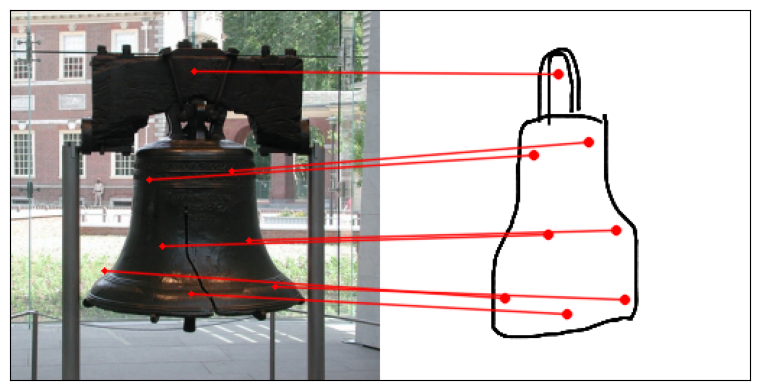

1210


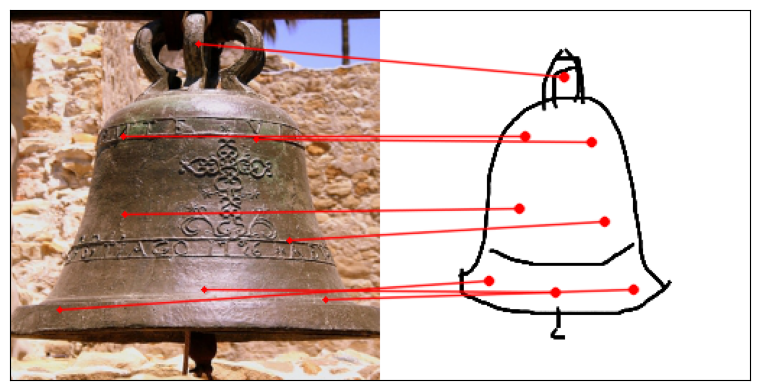

1220


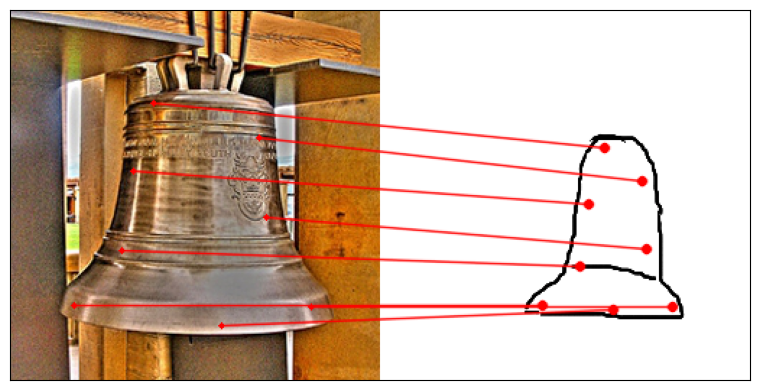

1230


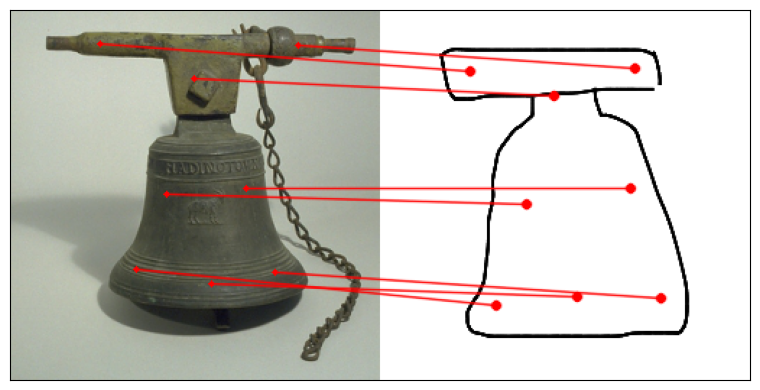

1240


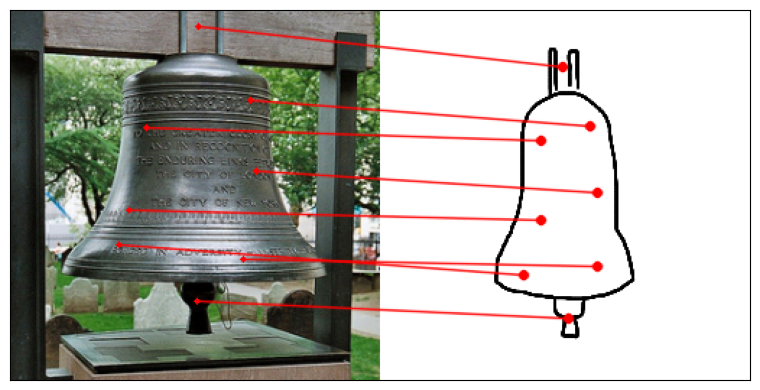

1250


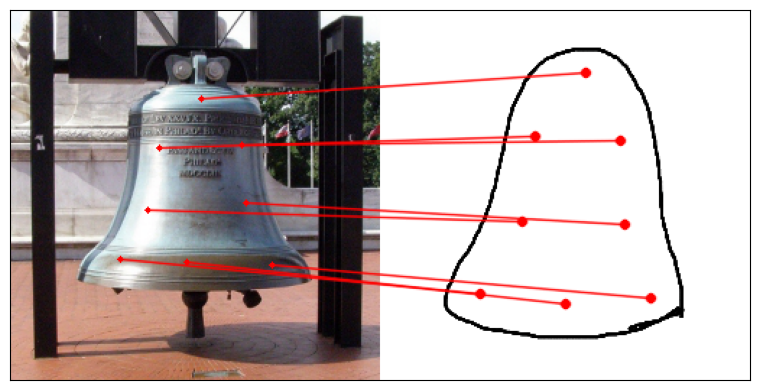

1260


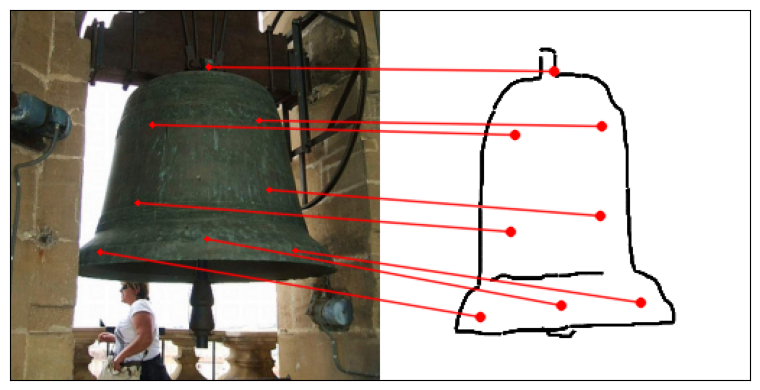

1270


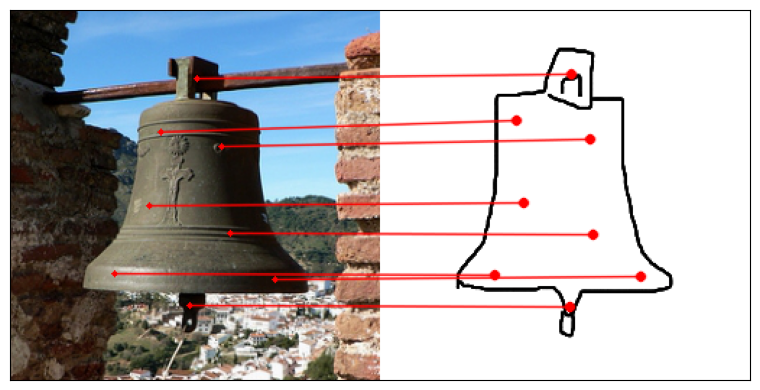

1280


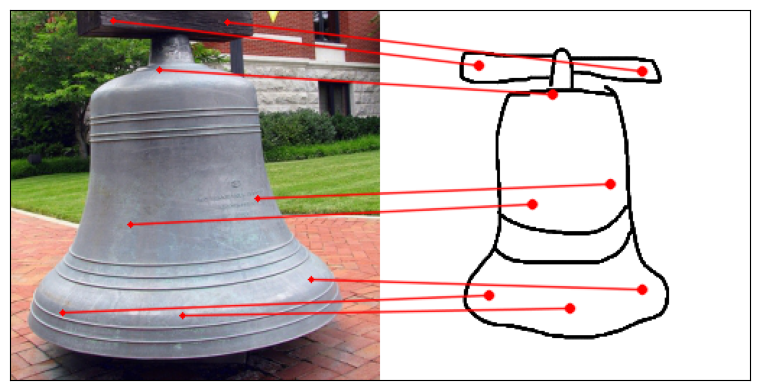

1290


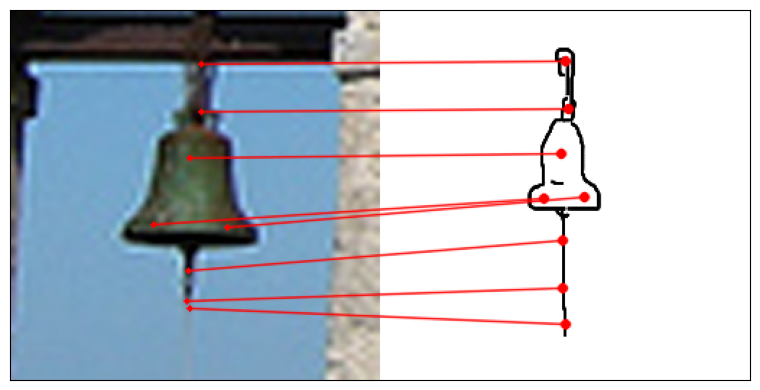

In [50]:
num_photo_per_category = 100
start_idx = category_idx * num_photo_per_category

step_size = 10

for i in range(start_idx, start_idx + num_photo_per_category, step_size):
    print(i)
    # load sample
    data = dataset[i]
    photo, sketch, photo_kps, sketch_kps = data
    photo = photo.unsqueeze(0)
    sketch = sketch.unsqueeze(0)
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    # unnormalize the normalized image
    unnorm_photo = photo.permute(0, 2, 3, 1) * torch.Tensor([0.229, 0.224, 0.225]) + torch.Tensor([0.485, 0.456, 0.406])
    unnorm_sketch = sketch.permute(0, 2, 3, 1) * torch.Tensor([0.229, 0.224, 0.225]) + torch.Tensor([0.485, 0.456, 0.406])
    unnorm_photo = unnorm_photo.permute(0, 3, 1, 2)
    unnorm_sketch = unnorm_sketch.permute(0, 3, 1, 2)

    # create canvas
    canvas = np.zeros((256, 256 * 2, 3), dtype=np.uint8)
    canvas[:, :256] = unnorm_photo.cpu()[0].permute(1, 2, 0).numpy() * 255
    canvas[:, 256:] = unnorm_sketch.cpu()[0].permute(1, 2, 0).numpy() * 255

    # extract keypoints
    xa = photo_kps[:, 1]
    ya = photo_kps[:, 0]

    xb = sketch_kps[:, 1]
    yb = sketch_kps[:, 0]

    xa = [int(round(float(x))) for x in xa]
    xb = [int(round(float(x))) for x in xb]
    ya = [int(round(float(x))) for x in ya]
    yb = [int(round(float(x))) for x in yb]

    # draw keypoint annotations
    for j in range(8):
        canvas = cv2.line(canvas, (xa[j], ya[j]), (xb[j] + 256, yb[j]), color=(255, 0, 0), thickness=1, lineType=cv2.LINE_AA)
        canvas = cv2.circle(canvas, (xa[j], ya[j]), radius=2, color=(255, 0, 0), thickness=-1)
        canvas = cv2.circle(canvas, (xb[j] + 256, yb[j]), radius=3, color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)

    ax.imshow(canvas)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()